In [1]:
# Importar as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Puxar os dados do arquivo txt

db = pd.read_csv('transacoes.txt', sep='|', header=None, names=['tipo','descricao','valor','data','categoria'])

# Exibir informações iniciais sobre os dados

print("="*60)
print("Dados financeiros pessoais")
print("="*60)

print(f"\n {len(db)} transações registradas.\n")

print("Primeiras linhas:")
display(db.head())

print("Informações gerais do banco de dados:")
display(db.info())



print("")

Dados financeiros pessoais

 177 transações registradas.

Primeiras linhas:


,tipo,descricao,valor,data,categoria
0,receita,Uber,522.0,2025-10-31,NaN
1,despesa,contas de casa,600.0,2025-11-01,Casa
2,receita,salario,2000.0,2025-11-02,NaN
3,receita,Salário mensal,5800.0,2025-01-05,NaN
4,despesa,Aluguel apartamento,1900.0,2025-01-05,Moradia


Informações gerais do banco de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tipo       177 non-null    object 
 1   descricao  177 non-null    object 
 2   valor      177 non-null    float64
 3   data       177 non-null    object 
 4   categoria  149 non-null    object 
dtypes: float64(1), object(4)
memory usage: 7.0+ KB


None

# NOTEBOOK EM ANDAMENTO

### Análise Fluxo de Caixa

ANÁLISE FINANCEIRA - SALDO MENSAL E ACUMULATIVO

Seu saldo é: R$ -24061.52

1. Receita - Despesa em cada mês.


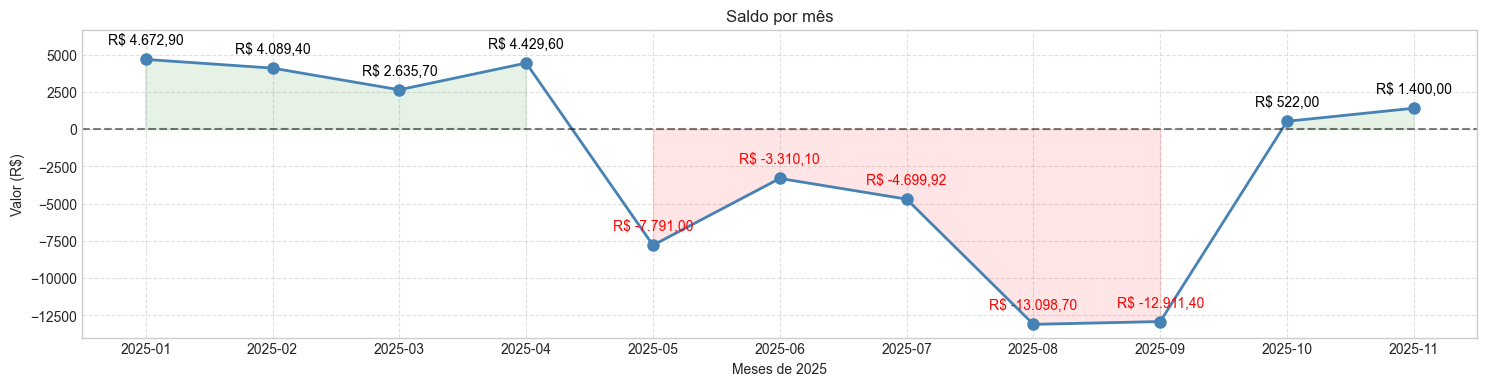

2. A evolução do patrimônio através dos meses.


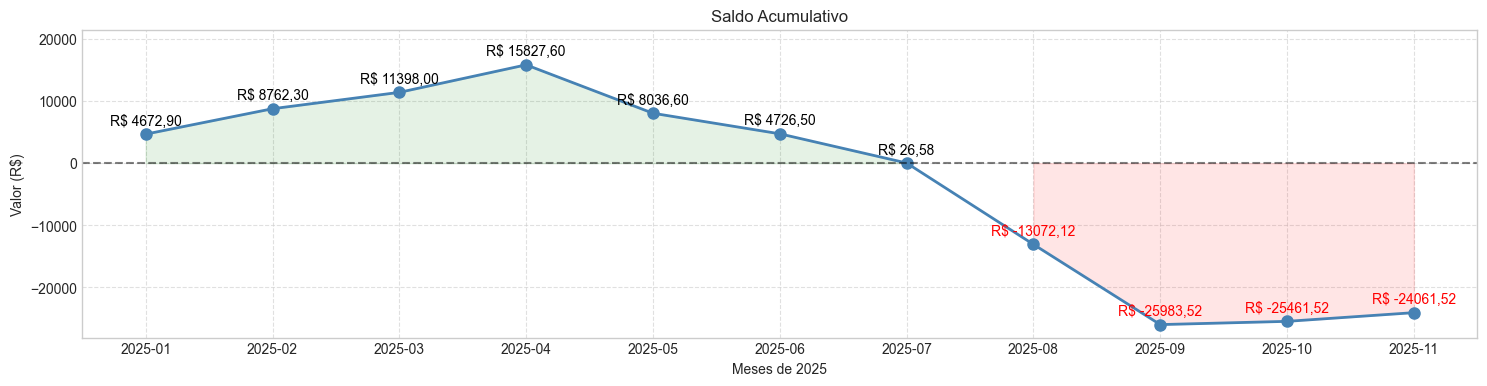

In [35]:
# Transformar a coluna 'data' para uma coluna de 
print('='*60)
print("ANÁLISE FINANCEIRA - SALDO MENSAL E ACUMULATIVO")
print('='*60)



db['data'] = pd.to_datetime(db['data'])

db['data_mes'] = db['data'].dt.strftime('%Y-%m')

saldo = db.groupby(['data_mes', 'tipo'])['valor'].sum().reset_index()
df = saldo.pivot_table(index='data_mes', columns='tipo', values='valor', aggfunc='sum').reset_index().fillna(0)
df['saldo'] = df['receita'] - df['despesa']
df['saldo_cum'] = df['saldo'].cumsum()
print(f"\nSeu saldo é: R$ {df['saldo'].sum():.2f}\n")

print("1. Receita - Despesa em cada mês.")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(18,4))

plt.plot(df['data_mes'],df['saldo'], marker='o', markersize=8, color='steelblue', linewidth=2, label='Saldo')
plt.axhline(y=0, color='black',linestyle='--',linewidth=1.5,alpha=0.5)
plt.fill_between(range(len(df)), df['saldo'], 0, 
                 where=(df['saldo'] >= 0), 
                 color='green', alpha=0.1, label='Período Positivo')
plt.fill_between(range(len(df)), df['saldo'], 0, 
                 where=(df['saldo'] < 0), 
                 color='red', alpha=0.1, label='Período Negativo')
for i, valor in enumerate(df["saldo"]):
    valor = round(valor,2)
    plt.text(i, valor + 1000, f"R$ {valor:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'), ha='center', fontsize=10, color= 'black' if valor > 0 else 'red')

plt.title("Saldo por mês")
plt.xlabel("Meses de 2025")
plt.ylabel("Valor (R$)")
ymin,ymax = plt.ylim()
plt.ylim(ymin,ymax*1.2)
plt.grid(True,linestyle="--",alpha = 0.6)
plt.show()

print("2. A evolução do patrimônio através dos meses.")

plt.figure(figsize=(18,4))

plt.plot(df['data_mes'],df['saldo_cum'],marker='o', markersize=8, color='steelblue', linewidth=2, label='Saldo Cumulativo')
plt.axhline(y=0, color='black',linestyle='--',linewidth=1.5,alpha=0.5)
plt.fill_between(range(len(df)), df['saldo_cum'], 0, 
                 where=(df['saldo_cum'] >= 0), 
                 color='green', alpha=0.1, label='Período Positivo')
plt.fill_between(range(len(df)), df['saldo_cum'], 0, 
                 where=(df['saldo_cum'] < 0), 
                 color='red', alpha=0.1, label='Período Negativo')

for i, valor in enumerate(df['saldo_cum']):
    plt.text(i, valor + 1500, f"R$ {valor:.2f}".replace(',', 'X').replace('.', ',').replace('X', '.'), ha='center',fontsize=10,color= 'black' if valor > 0 else 'red')
plt.title("Saldo Acumulativo")
plt.xlabel("Meses de 2025")
plt.ylabel("Valor (R$)")
ymin,ymax = plt.ylim()
plt.ylim(ymin,ymax*1.2)
plt.grid(True,linestyle="--",alpha = 0.6)
plt.show()


